# Q learner with fictitious play

In [23]:
import numpy as np

from engine import RMG
from agent import RandomAgent, IndQLearningAgent, FPLearningAgent, Mem1FPLearningAgent,TFT

In [26]:
batch_size = 1
max_steps = 20
gamma = 0.96

# Reward matrix for the Iterated Prisoner's Dilemma
ipd_rewards = np.array([[-1., 0.], [-3., -2.]])

env = RMG(max_steps=max_steps, payouts=ipd_rewards, batch_size=batch_size)
env.reset()

possible_actions = [0, 1]  # Cooperate or Defect

#p0, p1 = TFT(possible_actions),TFT(possible_actions)

#p0, p1 = Mem1FPLearningAgent(possible_actions, possible_actions,
#                            n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma), TFT(possible_actions)

p0, p1 = FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=gamma),\
    TFT(possible_actions)

#adversary, dm = IndQLearningAgent(possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=gamma), \
#    FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=gamma)


#p0, p1 = FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=ga#mma), \
#    FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=gamma)




n_iter = 1000

r0s = []
r1s = []

a0s = []
a1s = []

a0_prev = None
a1_prev = None

# State = Memory
s = 0

for i in range(n_iter):

    # A full episode:
    done = False

    while not done:

        # Agents decide
        
        a0 = p0.act()
        #a1 = p1.act()

        #a0 = p0.act( (a0_prev,a1_prev) )
        a1 = p1.act( (a1_prev,a0_prev) )

        # World changes
        _, (r0, r1), done, _ = env.step(([a0], [a1]))

        # Agents learn

        #p0.update((a0_prev, a1_prev), (a0, a1), (r0, r1), (a0,a1) )
        p0.update(s, (a0, a1), (r0, r1), s )
        p1.update((a1_prev, a0_prev), (a1, a0), (r1, r0), (a1,a0) )

        #s = new_s  #stateless!

        #print(r0, r1)
        r0s.append(r0[0])
        r1s.append(r1[0])

        a0s.append(a0)
        a1s.append(a1)



        a0_prev = a0
        a1_prev = a1
        

    env.reset()

In [27]:
import pandas as pd
actions = pd.DataFrame({"DM" : a0s, "AD" : a1s})
actions.tail(10)

,AD,DM
19990,1,1
19991,1,1
19992,1,1
19993,1,1
19994,1,1
19995,1,0
19996,0,1
19997,1,0
19998,0,1
19999,1,0


In [28]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

We report moving avearage of rewards, since it's common in RL taks

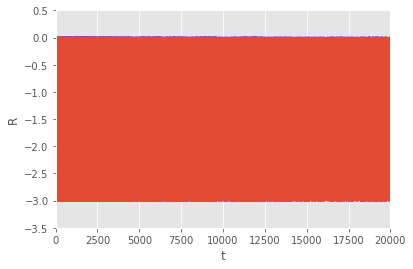

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

plt.axis([0, max_steps*n_iter, -3.5, 0.5])
plt.plot(moving_average(r0s, 100),'b')
plt.plot(moving_average(r1s, 100))

plt.xlabel('t');
plt.ylabel('R');

plt.savefig('img/FPQvsQ.png')

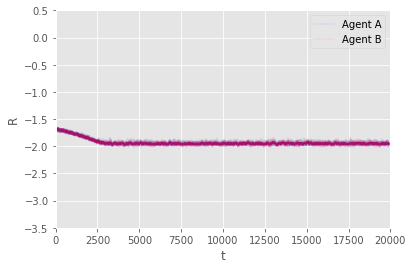

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

plt.axis([0, max_steps*n_iter, -3.5, 0.5])
for i in range(N_EXP):
    plt.plot(moving_average(r0ss[i], 100), 'b', alpha=0.05)
    plt.plot(moving_average(r1ss[i], 100), 'r', alpha=0.05)
    
plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), 'b', alpha=0.5)
plt.plot(moving_average(np.asarray(r1ss).mean(axis=0), 100), 'r', alpha=0.5)

plt.xlabel('t');
plt.ylabel('R');

plt.legend(['Agent A', 'Agent B']);

plt.savefig('img/FPQvsQ.png')